In [3]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sint #ADDED 

In [4]:
def innerproduct(u,v):
    return sint.simpson(u*v) #CHANGED
def Norm(v):
    return ((innerproduct(v,v))**(1/2))
def unitvector(v):
    return v/Norm(v)

# Gram Schmidt 

$$\vec{U_k} = \vec{v_k} - (\vec{v_k} . \hat{u_1})\hat{u_1} - (\vec{v_k} . \hat{u_2})\hat{u_2} ------- -(\vec{v_k} . \hat{u}_{k-1})\hat{u}_{k-1} $$
$$\hat{u}_k = \frac{\vec{U_k}}{||\vec{U_k}||}$$

In [5]:
def series(v,U):     
    add=0
    for i in range(0,len(U)):
        add=add+(innerproduct(v,U[i]))*U[i]
    return add

In [6]:
def Gram_schmidt(V):      ## V is linearly independent set
    n=len(V)              ## n is number of linear independent vectors
    u1=unitvector(V[0])
    U=[u1]
    for i in range(1,n):
        U2=V[i]-series(V[i],U)        ## U2 is orthogonal vector
        u2=unitvector(U2)             ## u2 is orthonormal vector 
        U.append(u2)
    return U          ## U is orthonormal set

In [7]:
V=np.array([[1,0,-1],[-1,4,-1],[2,1,2]]) #always define as array
#V=[[1,0,-1],[-1,4,-1],[2,1,2]]
U=Gram_schmidt(V)
print(U)

[array([ 1.22474487,  0.        , -1.22474487]), array([-0.21320072,  0.85280287, -0.21320072]), array([1.20604538, 0.15075567, 1.20604538])]


In [8]:
#defining basis matrix for degree 5
n=5 
m=100
x=np.linspace(-1,1,m)
v=np.zeros((n,m))
for i in range(0,n):
    v[i]= x**i

In [9]:
u=Gram_schmidt(v) #using gram schmidt to get a orthonormal basis which is also legandre polynomials

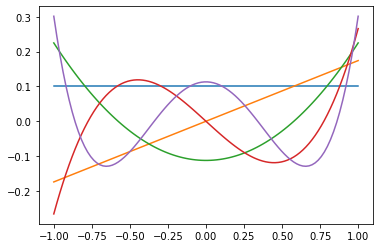

In [10]:
for i in range(n):
    plt.plot(x,u[i])

In [11]:
#to approximate functions

In [12]:
exponent=np.cos(x) #example function


In [13]:
ap=0 #calculating the approximated function
for i in range(0,n):
    ap+= innerproduct(exponent,u[i])*u[i]

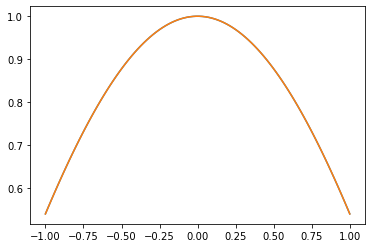

In [14]:
plt.plot(x,ap) #comparing the plots

plt.plot(x,exponent)